# Credit Card Fraud
### Dominic Dotterrer, Ph.D.
### 27 March 2024

In [1]:
# Header
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

## 1. Data Exploration and Hygiene

We are going to load, describe and clean/format the data

In [2]:
data = pd.read_json('transactions/transactions.txt', lines=True)
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


We can start by taking a cursory look at the statistics.

In [3]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [4]:
### The number of unique values in each column
data.nunique(dropna = False)

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

In [5]:
### We count up null values
data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

On first pass we observe no missing values, although some columns are effectively empty.

We examined columns `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises` and `recurringAuthInd` and found that they had all been zeroed out with no missing values we will drop those columns. We will not include these in our Null value count.

In [6]:
data = data.drop(['echoBuffer',
                  'merchantCity',
                  'merchantState',
                  'merchantZip',
                  'posOnPremises',
                  'recurringAuthInd'], axis = 1)

Additionally we notice that some columns have an empty string value:

In [7]:
data[data['transactionType'] == '']

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
674,984504651,984504651,50000,10947.84,2016-08-30T18:03:20,153.38,Walgreens #482304,US,US,05,...,2015-07-27,2016-06-25,640,640,8332,,39052.16,False,False,False
1302,114896048,114896048,15000,7674.25,2016-08-14T20:39:43,33.06,Lyft,US,US,05,...,2015-12-19,2016-06-10,773,773,8915,,7325.75,False,False,False
1452,114896048,114896048,15000,6564.05,2016-11-26T07:28:01,312.31,gap.com,US,US,05,...,2015-12-19,2016-06-10,773,773,8915,,8435.95,False,False,False
3290,805566864,805566864,15000,9072.07,2016-04-02T23:17:33,75.72,Shake Shack #170441,US,US,05,...,2014-08-19,2014-08-19,225,225,1467,,5927.93,True,False,False
3610,805566864,805566864,15000,9631.20,2016-12-01T10:34:23,126.86,Subway #923262,US,US,05,...,2014-08-19,2014-08-19,225,225,1467,,5368.80,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775963,685866922,685866922,5000,608.70,2016-10-03T07:13:33,211.10,cheapfast.com,US,US,09,...,2012-04-21,2016-02-05,561,561,3304,,4391.30,False,False,False
777671,198092241,198092241,7500,4307.74,2016-10-11T14:33:59,116.27,Rove Concepts,US,US,05,...,2014-12-14,2016-09-06,296,296,3156,,3192.26,True,False,False
781868,357985585,357985585,250,164.61,2016-05-08T12:34:31,366.88,sears.com,US,US,05,...,2015-06-28,2016-03-25,250,250,6441,,85.39,False,False,False
783122,931360316,931360316,7500,6453.36,2016-07-15T12:09:34,40.90,EZ Putt Putt #551896,US,US,05,...,2010-12-15,2010-12-15,770,770,9437,,1046.64,True,False,False


Let's count those up...

In [8]:
empty_counts = {}
for col in data.columns:
    vals = data[col].value_counts().to_dict()
    if '' in vals.keys():
        empty_counts[col] = vals['']

empty_counts

{'acqCountry': 4562,
 'merchantCountryCode': 724,
 'posEntryMode': 4054,
 'posConditionCode': 409,
 'transactionType': 698}

So there are 10447 cells which contain an empty string.

Finally, we will reformat the DateTime string...

In [10]:
### format the datetime string
dts = ['transactionDateTime',
       'currentExpDate',
       'accountOpenDate',
       'dateOfLastAddressChange']

for dt in dts:
    data[dt] = pd.to_datetime(data[dt])

## 2. Examining Numerical Columns

We will take a closer look at the numerical columns in greater detail by plotting them.

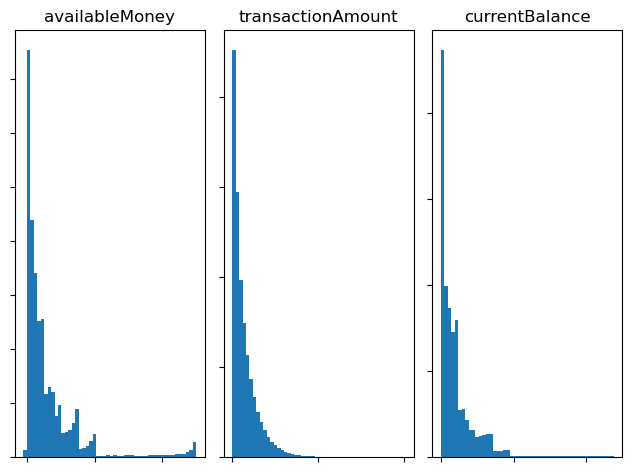

In [11]:
### Let's look at the numerical columns
ROW_SZ = 3
BINS = 50
NUMER_COLS = ['availableMoney', 'transactionAmount', 'currentBalance']

def histogram_numer_cols(df, column_names):
    rows = len(column_names)//ROW_SZ
    rows = rows + 1 if len(column_names)%ROW_SZ != 0 else rows
    figure, axis = plt.subplots(rows, ROW_SZ)
    for col in column_names:
        idx = column_names.index(col)
        x = idx//ROW_SZ
        y = idx%ROW_SZ
        if rows == 1:
            axis[y].hist(data[col], bins = BINS)
            axis[y].set_title(col)
            axis[y].xaxis.set_ticklabels([])
            axis[y].yaxis.set_ticklabels([])
        else:
            axis[x, y].hist(data[col], bins = BINS)
            axis[x, y].set_title(col)
            axis[x,y].xaxis.set_ticklabels([])
            axis[x,y].yaxis.set_ticklabels([])
    figure.tight_layout(pad = 1.0)
    plt.show()
    return


histogram_numer_cols(data, NUMER_COLS)

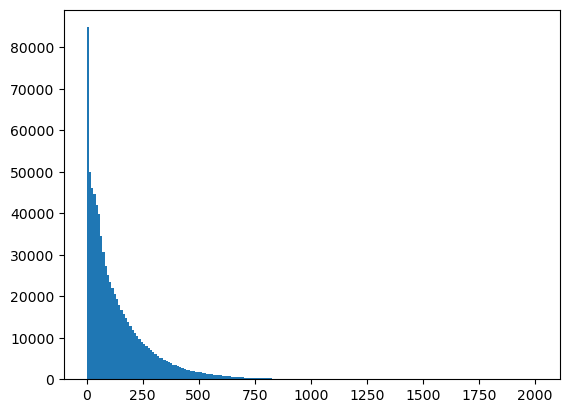

In [12]:
### Let's look more carefully at `transactionAmount`
count, amount, plot = plt.hist(data['transactionAmount'], bins = 200)

It is very likely that the transaction amounts satisfy a pareto principle/power law.

## 3. Examining Duplicate Transactions

Let's determine a way to algorithmically identify duplicate (reversed and multi-swipe) transactions.

In [13]:
data['transactionType'].value_counts()
#### Well, I am going to guess that `REVERSAL` is going to be a relevant feature. [^_^]

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

In [14]:
COLS_FOR_DEDUPE = ['accountNumber',
                   'customerId',
#                   'creditLimit', # In case credit limit is affected by the first txn
#                   'availableMoney', # In case available$ is affected by first txn
#                   'transactionDateTime', # We will examine the datetimes subsequently
                   'transactionAmount',
                   'merchantName',
                   'acqCountry',
                   'merchantCountryCode',
#                   'posEntryMode', # It is possible for these two that they would differ...
#                   'posConditionCode', # ... from the original txn.
                   'merchantCategoryCode',
                   'currentExpDate',
                   'accountOpenDate',
                   'dateOfLastAddressChange',
                   'cardCVV',
#                   'enteredCVV', # Removing this in case CVV was entered in error
                   'cardLast4Digits',
#                   'transactionType', # Removing this because one value is `REVERSAL`!
#                   'currentBalance', First txn might affect current balance
#                   'cardPresent', # Card might not be present in a reversal
#                   'expirationDateKeyInMatch', # In case the expiration was keyed in error.
                  ]

dupe_index = data.duplicated(COLS_FOR_DEDUPE, keep = False)
dupe_data = data.loc[dupe_index, :]
dupe_data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
11,830329091,830329091,5000,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,False,False,False
12,830329091,830329091,5000,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,40.75,False,False,False
13,830329091,830329091,5000,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,81.50,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786346,732852505,732852505,50000,49536.24,2016-11-22 19:30:16,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,463.76,True,False,False
786348,732852505,732852505,50000,49251.72,2016-11-25 13:39:10,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,748.28,False,False,False
786352,732852505,732852505,50000,49848.35,2016-12-07 14:05:14,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,151.65,True,False,False
786357,732852505,732852505,50000,48956.44,2016-12-22 07:27:23,51.48,Sunoco Gas #380975,US,US,05,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1043.56,True,False,False


In [15]:
dupe_data['transactionType'].value_counts()

PURCHASE                75553
REVERSAL                16000
ADDRESS_VERIFICATION      950
                           31
Name: transactionType, dtype: int64

In the original data, there are 20303 records with the `transactionType == REVERSAL`. Of those, 16000 show up as duplicate transactions. We should investigate the other 4303 `REVERSAL` txns that are not duplicate.

In [16]:
single_reversals = data.loc[~dupe_index,:]
single_reversals = single_reversals[single_reversals['transactionType'] == 'REVERSAL']
single_reversals['expirationDateKeyInMatch'].value_counts()

False    4301
True        2
Name: expirationDateKeyInMatch, dtype: int64

Looks like almost all of them were due to keying the expiration date incorrectly!

Okay, back to the duplicate txns... Let's try to identify multiswipe.

In [17]:
### We're going to look at duplicates whose 
TIME_WINDOW_IN_MIN = 60

delta = datetime.timedelta(minutes = TIME_WINDOW_IN_MIN)

def swipe_frequency(df):
    df = df.sort_values(by = 'transactionDateTime')
    df['txnDelta'] = df['transactionDateTime'].diff()
    df['freqFlag'] = df['txnDelta'] < delta
    return df
    
freq_data = dupe_data.groupby(COLS_FOR_DEDUPE).apply(swipe_frequency).reset_index()

freq_data[['transactionType','freqFlag']].value_counts()

transactionType       freqFlag
PURCHASE              False       68134
REVERSAL              False       10292
PURCHASE              True         7419
REVERSAL              True         5708
ADDRESS_VERIFICATION  False         731
                      True          219
                      False          23
                      True            8
dtype: int64

In [18]:
first_txn = freq_data[np.isnat(freq_data['txnDelta'])]
first_txn['transactionType'].value_counts()

PURCHASE                28792
ADDRESS_VERIFICATION      708
                           23
REVERSAL                    2
Name: transactionType, dtype: int64

Essentially none of the first transactions are reversals.

Of the duplicate date, we can break it into first txns, txns following the first by 60 min, and txns following the previous one by more than 60min.

| Txn Type             | First Txn | Within 60 min | After 60 min | Total |
| -------------------- | --------- | ------------- | ------------ | ----- |
| Purchase             | 28792     | 7419          | 39342        | 75553 |
| Reversal             | 2         | 5708          | 10290        | 16000 |
| Address Verification | 708       | 219           | 23           | 950   |
| Other                | 23        | 8             | 0            | 31    |
| -------------------- | --------- | ------------- | ------------ | ----- |
| Total                | 29525     | 13354         | 49655        | 92534 |

Of the 92534 duplicate transactions (which includes the first txn), 13354 of them occurred withing 60 minutes of the first txn. Of those, 5708 were flagged as `REVERSAL`.

So depending on whether you want to include `ADDRESS VERIFICATION` (I won't), I would say there are approximately 7500 multiswipe transactions in the data, and 16000 reversals.

Let's get the dollar amounts...

In [19]:
# Multiswipe dollar amount

multiswipe = freq_data[(freq_data['transactionType'] == 'PURCHASE')\
                       & (freq_data['freqFlag'] == True)]

multiswipe['transactionAmount'].sum()

1098527.43

Now keep in mind we are *not* including `REVERSAL` transactions that result from keying in expiry date (etc) incorrectly. (See above)

In [20]:
reversals = dupe_data[dupe_data['transactionType'] == 'REVERSAL']
reversals['transactionAmount'].sum()

2322554.0700000003

## 4. Modeling Fraud

We will apply some simple techniques to model fraud and test it on an out-sample.

This is a standard anomaly detection problem (please note, I am not saying it is easy!) and for problems of this type there are some obvious modeling approaches that come from basic machine learning:

- Decision Tree / Random Forest / Boosted Tree
- K-Nearest Neighbors
- Latent Space Inference (e.g. PCA or an Autoencoder)

KNN is pretty computationally intensive, so I am going to pass on that. Also, any latent space inference will require a lot of feature engineering which I don't have time for, and autoencoders are have very little interpretability and therefore are difficult to debuy. So ruling those out, I am going to use a basic Random Forest Regressor--it's easy and should find the signal if it is readable from the data.

#### Some minor feature engineering

There are a few things we need to do to get the data ready. Primarily, I want to convert all the numerical columns to categorical variables. I am going to replace each value (e.g. `transactionAmount`) with a quantile in the data.

In [21]:
def make_quantiles(num_quantiles):
    q = np.linspace(0,1, num = num_quantiles+1)
    return q[1:-1]

def convert_to_quantile(df, column_name, num_quantiles):
    quantiles = make_quantiles(num_quantiles)
    vals = df[column_name].unique()
    classes = np.quantile(vals, quantiles)
    idxs = np.searchsorted(classes, df[column_name])
    return idxs

#Test
unique, counts = np.unique(convert_to_quantile(data, 'transactionDateTime', 4),
                           return_counts = True)

dict(zip(unique, counts))

{0: 196439, 1: 196591, 2: 196647, 3: 196686}

In [22]:
### I am going to drop the transactionDateTime and replace it with Time since last transaction.
def last_txn(df):
    series = df['transactionDateTime'].sort_values().diff().fillna(datetime.timedelta(minutes = 0))
    df['timeSinceLastTxn'] = series
    return df

def category_to_int(df, column_name):
    categories = df[column_name].value_counts().keys().to_list()
    return df[column_name].apply(lambda x: categories.index(x))

In [23]:
NUM_QUANTILES = 20 #Not too many

STR_COLS = ['correctCVV',
            'merchantCategoryCode',
            'transactionType',
            'cardPresent',
            'expirationDateKeyInMatch',
            'isFraud',
            'acqCountry',
            'merchantCountryCode',
            'creditLimit',
            'posEntryMode',
            'posConditionCode',
           ]

COLS_TO_BATCH = ['availableMoney',
                 'transactionAmount',
                 'currentBalance',
                 'currentExpDate',
                 'accountOpenDate',
                 'dateOfLastAddressChange',
                 'transactionDateTime',
                 'timeSinceLastTxn', #One of my added columns
                ]

DROP_COLS = ['accountNumber',
             'customerId',
             'merchantName',
             'cardCVV',
             'enteredCVV',
             'cardLast4Digits',
            ]

model_data = data.groupby('accountNumber').apply(last_txn)

model_data['correctCVV'] = (data['cardCVV'] == data['enteredCVV'])

for col in STR_COLS:
    model_data[col] = category_to_int(model_data, col)

for col in COLS_TO_BATCH:
    model_data['batch_' + col] = convert_to_quantile(model_data, col, NUM_QUANTILES)

model_data = model_data.drop(COLS_TO_BATCH + DROP_COLS, axis = 1)

model_data

,creditLimit,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,cardPresent,expirationDateKeyInMatch,isFraud,correctCVV,batch_availableMoney,batch_transactionAmount,batch_currentBalance,batch_currentExpDate,batch_accountOpenDate,batch_dateOfLastAddressChange,batch_transactionDateTime,batch_timeSinceLastTxn
0,0,0,0,2,0,5,0,0,0,0,0,11,2,0,5,16,14,12,0
1,0,0,0,1,0,2,0,1,0,0,0,11,2,0,6,16,14,15,19
2,0,0,0,1,0,13,0,0,0,0,0,11,0,0,8,16,14,16,19
3,0,0,0,1,0,13,0,0,0,0,0,11,0,0,8,16,14,18,19
4,0,0,0,2,0,1,0,1,0,0,0,11,2,0,14,18,15,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,6,0,0,3,0,5,0,0,0,0,0,19,3,3,4,7,6,19,2
786359,6,0,0,1,0,14,0,0,0,0,0,19,0,3,5,7,6,19,11
786360,6,0,0,2,0,5,0,0,0,0,0,19,1,4,8,7,6,19,9
786361,6,0,0,1,2,0,0,0,0,0,0,19,1,4,3,7,6,19,7


In [24]:
labels = model_data['isFraud'].to_numpy()
features = model_data.drop('isFraud', axis = 1).to_numpy()
features.shape

(786363, 18)

In [25]:
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels,
                                                                            test_size = 0.25,
                                                                            random_state = 5318008)

train_features.astype(np.float64)

array([[ 5.,  0.,  0., ..., 17.,  3.,  2.],
       [ 0.,  0.,  0., ..., 17.,  6.,  2.],
       [ 4.,  0.,  0., ...,  9.,  1.,  8.],
       ...,
       [ 0.,  0.,  0., ..., 14.,  5.,  3.],
       [ 0.,  0.,  0., ...,  6., 13., 19.],
       [ 8.,  0.,  0., ...,  7.,  5.,  8.]])

We are going to demonstrate three ensemble methods:
- Decision Tree (not really an ensemble)
- Random Forest 
- Light Gradient Boosting Machine (https://github.com/Microsoft/LightGBM)

In [26]:
dt = DecisionTreeRegressor(criterion = 'absolute_error',
                           random_state=5318008)

dt.fit(train_features.astype(np.float64), train_labels.astype(np.float64))

DecisionTreeRegressor(criterion='absolute_error', random_state=5318008)

We are going to compute `errors = predictions - test_labels`

Note that
- Type I Error: `errors > 0`
- Type II Error: `errors < 0`

In [28]:
dt_predictions = dt.predict(test_features)
dt_errors = dt_predictions - test_labels
type1 = dt_errors[dt_errors > 0.5].size/dt_errors.size
type2 = dt_errors[dt_errors < -0.5].size/dt_errors.size

print("Percent of type I error on the out-sample:" + str(type1))
print("Percent of type II error on the out-sample:" + str(type2))

Percent of type I error on the out-sample:0.021760914792640557
Percent of type II error on the out-sample:0.015183808007487627


Now we will try LightGBM, which is a ensemble model based on histograms.

In [29]:
gbr = HistGradientBoostingRegressor(loss = 'absolute_error',
                                    random_state = 5318008)

gbr.fit(train_features.astype(np.float64), train_labels.astype(np.float64))

HistGradientBoostingRegressor(loss='absolute_error', random_state=5318008)

In [30]:
gbr_predictions = gbr.predict(test_features)
gbr_errors = gbr_predictions - test_labels
type1 = gbr_errors[gbr_errors > 0.5].size/gbr_errors.size
type2 = gbr_errors[gbr_errors < -0.5].size/gbr_errors.size

print("Percent of type I error on the out-sample:" + str(type1))
print("Percent of type II error on the out-sample:" + str(type2))

Percent of type I error on the out-sample:0.0
Percent of type II error on the out-sample:0.016190975171803387


Now we will train a random forest. This is computationally very expensive given the size of the training dataset, so we will keep the number of trees small (at the cost of accuracy). I am running this on my laptop after all.

In [ ]:
NUM_TREES = 10

rf = RandomForestRegressor(criterion = 'absolute_error',
                           n_estimators = NUM_TREES,
                           random_state = 5318008) # Random Forest
rf.fit(train_features.astype(np.float64), train_labels.astype(np.float64)) # Train

In [ ]:
rf_predictions = rf.predict(test_features)
rf_errors = rf_predictions - test_labels
type1 = rf_errors[rf_errors > 0.5].size/rf_errors.size
type2 = rf_errors[rf_errors < -0.5].size/rf_errors.size

print("Percent of type I error on the out-sample:" + str(type1))
print("Percent of type II error on the out-sample:" + str(type2))